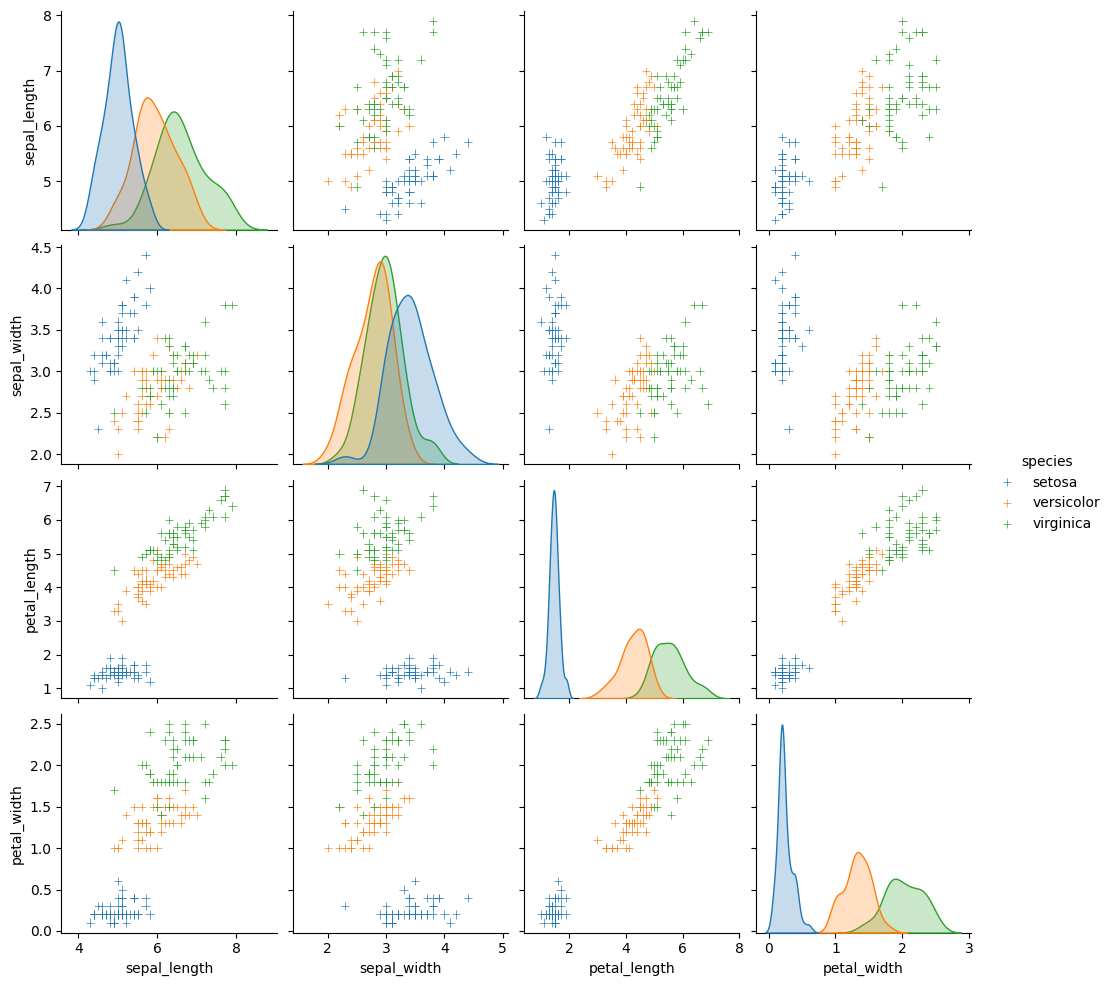

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset and plot features
data = pd.read_csv('./iris.csv')
g = sns.pairplot(data, hue='species', markers='+')
plt.show()

In [3]:

codes = {'setosa' : 0, 'versicolor' : 1, 'virginica' : 2}
data['species'] = data['species'].map(codes)


scaler = StandardScaler()
db = {'features': scaler.fit_transform(data.drop(columns= ['species'])),
    'labels': data['species']}


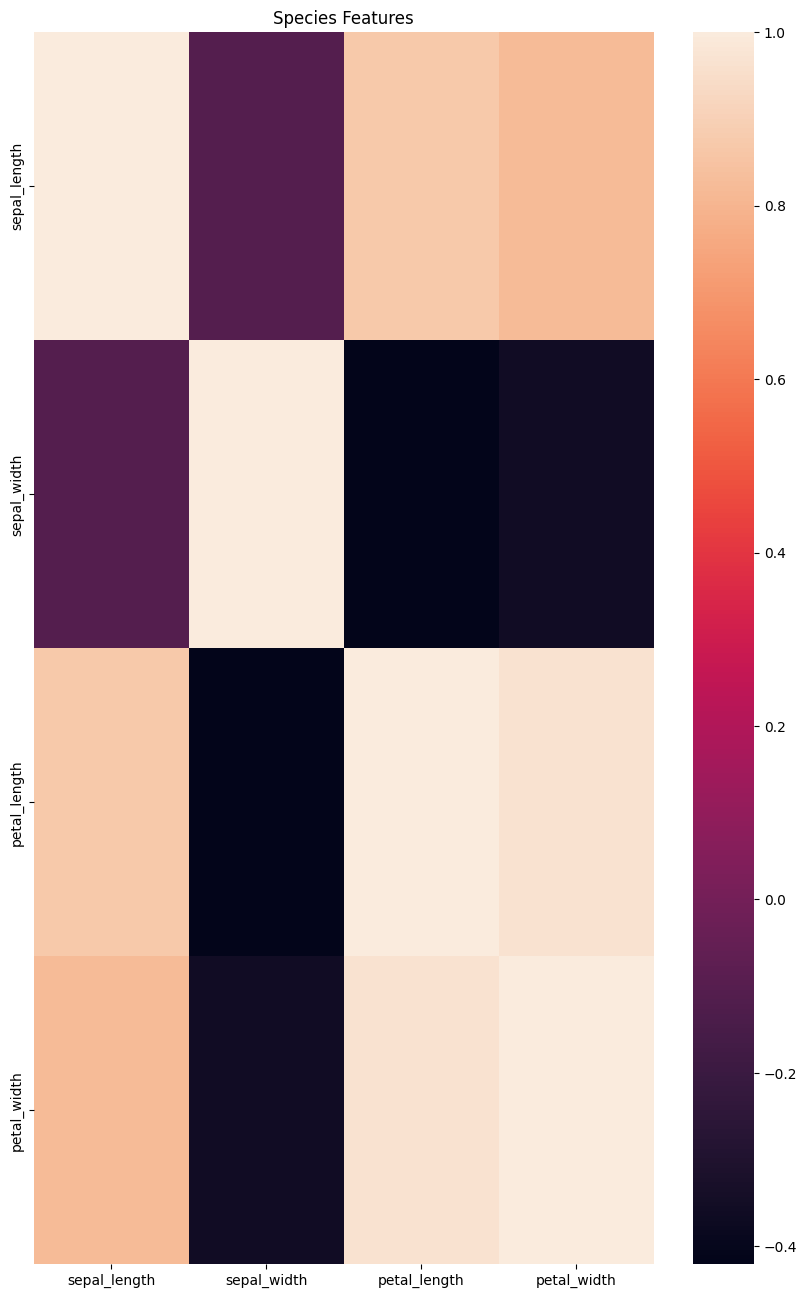

In [4]:

def matrix_corr(db, title):
    matriz_Ms = pd.DataFrame(db).corr()
    plt.figure(figsize=(10, 16))
    plt.title(f'{title}')
    
    sns.heatmap(matriz_Ms,
            xticklabels=matriz_Ms.columns,
            yticklabels=matriz_Ms.columns)

matrix_corr(data.drop(columns=['species']), title = 'Species Features')



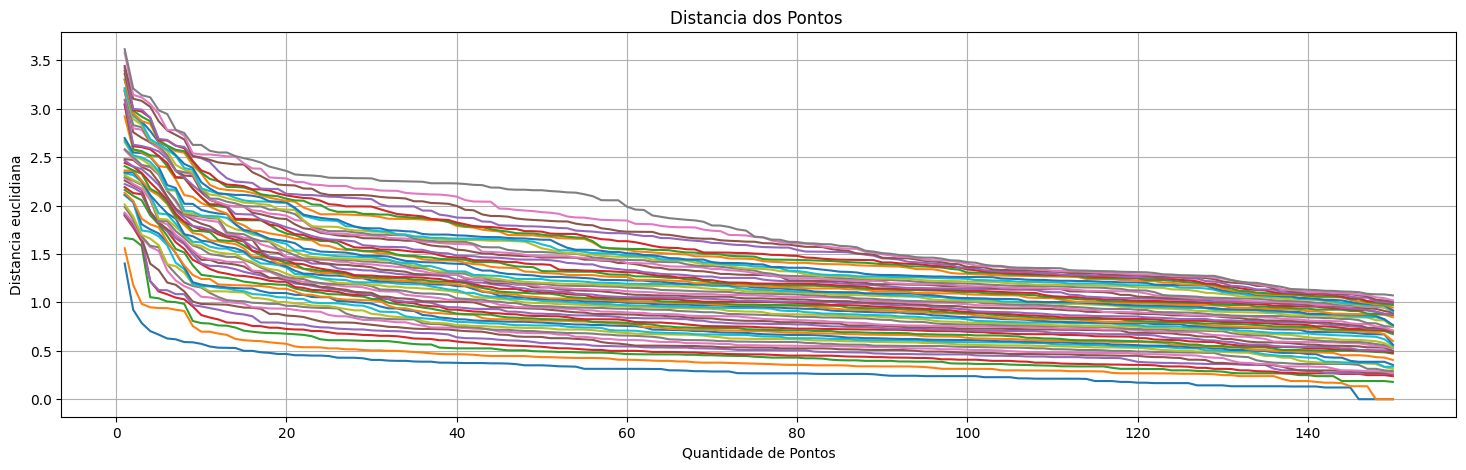

In [5]:

import numpy as np
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# select features and separate train/test datasets

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(db['features'],db['labels'], test_size= 0.4, random_state= 5)


from sklearn.neighbors import NearestNeighbors
output = []
nn = range(2,50)

fig = plt.figure(figsize=(18, 5))
ax = fig.add_subplot(111)
for k in nn:
    nbrs = NearestNeighbors(n_neighbors=k, metric = 'euclidean', algorithm = 'ball_tree').fit(db['features'])
    distances, indices = nbrs.kneighbors(db['features'])
    distances = np.sort(distances, axis=0)
    distances = sorted(distances[:,k-1], reverse=True) # Ordena do maior para o menor
    ax.plot(list(range(1,len(distances)+1)),distances)
    output.append(distances)
    
plt.title('Distancia dos Pontos ')
ax.set_xlabel('Quantidade de Pontos')
ax.set_ylabel('Distancia euclidiana')
ax.grid()
plt.show()


The average maximum distance between two neighboring samples is: 1.5107487040342191
The number of samples in a neighborhood: [30]


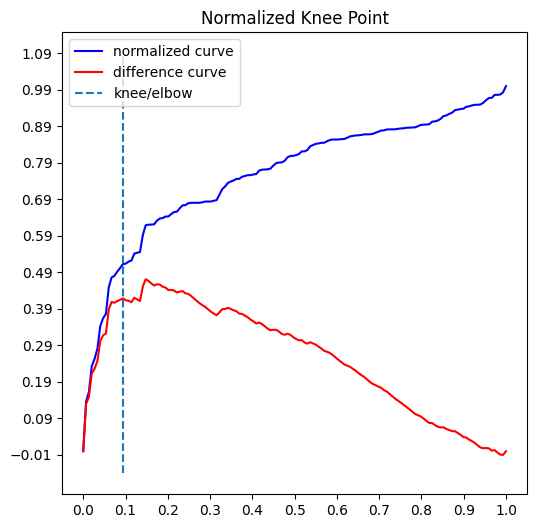

In [6]:

from kneed import KneeLocator

#https://kneed.readthedocs.io/en/stable/api.html#kneelocator
neighbors = []
for d in output:
    kneedle = KneeLocator(range(1,len(d) +1),  #x values
                          d, # y values
                          S=1.0, #parameter suggested from paper
                          curve="convex", #parameter from figure
                          direction="decreasing") #parameter from figure
    neighbors.append(kneedle.knee_y) 

mean = sum(neighbors)/len(neighbors)
arr = np.abs(np.array(neighbors)- mean)
indice = np.where(arr == np.amin(arr))

print(f'The average maximum distance between two neighboring samples is: {mean}')
print(f'The number of samples in a neighborhood: {indice[0]}')

kneedle = KneeLocator(range(1,len(output[38]) +1),  #x values
                    output[38], # y values
                    S=1.0, #parameter suggested from paper
                    curve="convex", #parameter from figure
                    direction="decreasing") #parameter from figure
kneedle.plot_knee_normalized()


In [7]:

from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors = int(indice[0]))
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
print(classification_report(Y_test,y_pred))

from sklearn.metrics import mean_absolute_percentage_error, accuracy_score
print(f"Mean absolute Percentage Error: {mean_absolute_percentage_error(Y_test,y_pred)*100}")
print(f"Accuracy Score: {accuracy_score(Y_test,y_pred)*100}")



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.73      0.90      0.81        21
           2       0.86      0.63      0.73        19

    accuracy                           0.85        60
   macro avg       0.86      0.85      0.85        60
weighted avg       0.86      0.85      0.85        60

Mean absolute Percentage Error: 9.166666666666666
Accuracy Score: 85.0


/tmp/ipykernel_289688/1142504368.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  knn = KNeighborsClassifier(n_neighbors = int(indice[0]))


Accuracy Score: 86.66666666666667


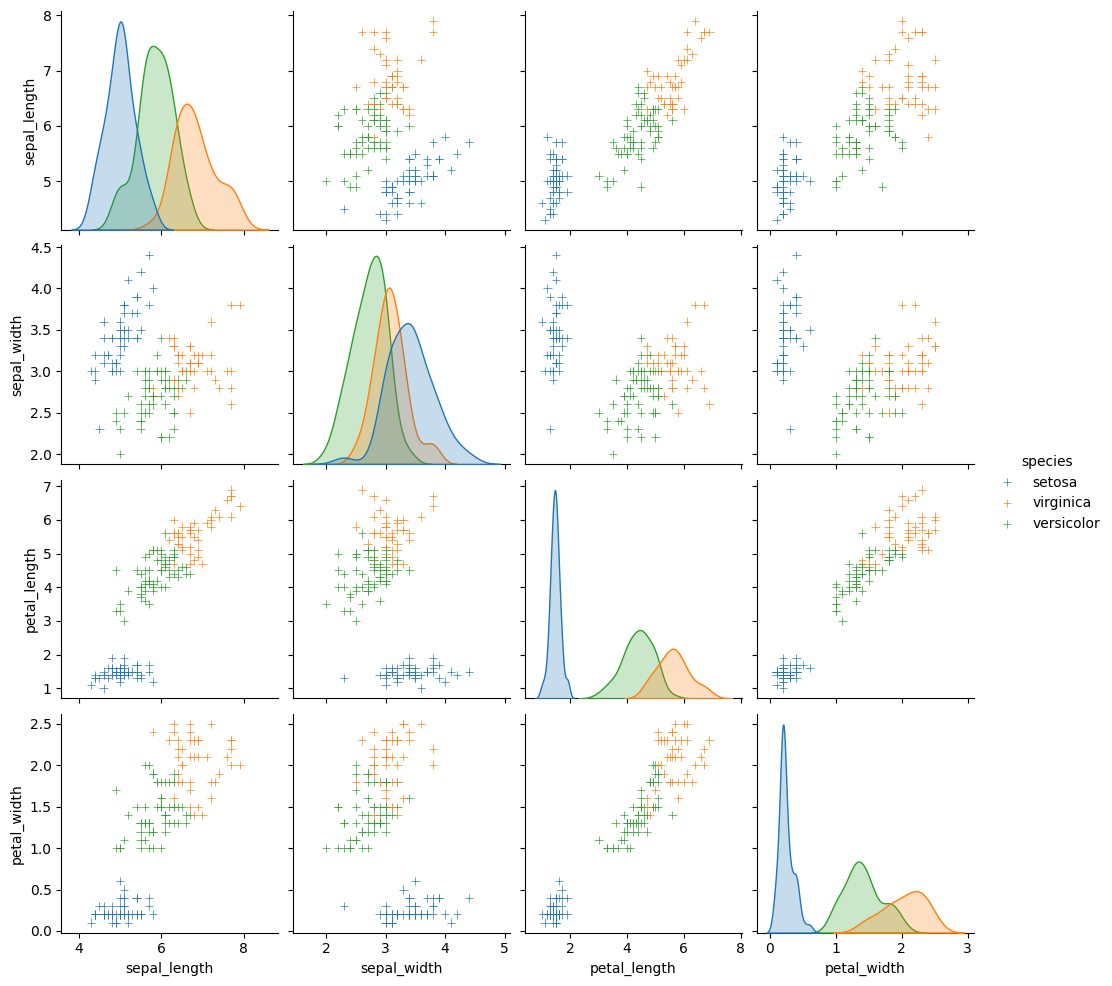

In [8]:

#prevendo todo o dataset
predicoes = knn.predict(db['features'])
print(f"Accuracy Score: {accuracy_score(db['labels'],predicoes)*100}")

data['species'] = predicoes

uncodes = {value: key for key, value in codes.items()}
data.replace({"species": uncodes},inplace=True)

sns.pairplot(data, hue='species', markers='+')
plt.show()


In [9]:
import pickle

# save
with open('model/iris.pkl','wb') as f:
    pickle.dump(knn,f)


## Contato

**Nome:** Lucas Oliveira Alves  
**Email:** [alves_lucasoliveira@usp.br](mailto:alves_lucasoliveira@usp.br)  
**LinkedIn:** [linkedin.com/in/cyblx](https://www.linkedin.com/in/cyblx/)  
**GitHub:** [github.com/cyblx](https://github.com/cyblx)